### Reinforcement Learning in a grid world

In [1]:
! pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 41.9 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [3]:
warnings.filterwarnings("ignore")

####  **Theme** - Treasure Hunt Grid world with Boost as positive rewards and holes as negative rewards, end goal is worth +50 points

- **Number of states**: 20 (5 rows 4 columns) [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3), (4, 0), (4, 1), (4, 2), (4, 3)]


- **Actions**: Right(0), Left(1), Up(2), Down(3)


- **Rewards**: {+3,-3,-5,+2,+2 +50}

- **Objective**: Reach goal state (4,3) with max reward

#### Treasure Hunt Environment Class definition

In [84]:
## Treasure Hunt Environment Definition

class TreasureHuntEnvironment(gym.Env):
    def __init__(self, envt_type):
        self.environment_type = envt_type
        self.envt_width = 5
        self.envt_length = 4

        self.observation_space = spaces.Discrete(self.envt_width * self.envt_length)
        self.action_space = spaces.Discrete(4)

        self.agent_pos = (0, 0)
        self.goal_pos = (4, 3)

        # Initialize reward grid
        self.rewards = np.zeros((self.envt_width, self.envt_length), dtype=int)
        self.rewards[self.goal_pos] = 50
        self.rewards[4,1 ] = 3
        self.rewards[1, 1] = 2
        #self.rewards[3, 2] = 5
        self.rewards[0,2] = -5
        self.rewards[3, 1] = -3
        self.rewards[2,3] = 2

        self.done = False

    #defining movement per action
    def step(self, action):
        if self.done:
            raise Exception("Environment should be reset")

        # Defining actions
        if action == 0:  # go right
            self.agent_pos = (self.agent_pos[0], min(self.envt_length - 1, self.agent_pos[1] + 1))
        elif action == 1:  # go left
            self.agent_pos = (self.agent_pos[0], max(0, self.agent_pos[1] - 1))
        elif action == 2:  # go up
            self.agent_pos = (max(0, self.agent_pos[0] - 1), self.agent_pos[1])
        elif action == 3:  # go down
            self.agent_pos = (min(self.envt_width - 1, self.agent_pos[0] + 1), self.agent_pos[1])
        else:
            raise ValueError("Invalid action")

        # Defining rewards
        reward = self.rewards[self.agent_pos]

        # Updating variable "done" if the goal state is reached
        if self.agent_pos == self.goal_pos:
            self.done = True

        return self.agent_pos, reward, self.done

    #resetting agent to go to start position
    def reset(self):
        self.agent_pos = (0, 0)
        self.done = False
        return self.agent_pos

    #visualising grid
    def render(self,current_pos):

      fig, ax = plt.subplots(figsize=(5, 5))
      ax.set_xlim(-0.5, self.envt_length - 0.5)
      ax.set_ylim(-0.5, self.envt_width - 0.5)

      #Grid definition
      for x in range(self.envt_width):
          for y in range(self.envt_length):
              rect = plt.Rectangle((y - 0.5, x - 0.5), 1, 1, edgecolor='black', facecolor='white', linewidth=3)
              ax.add_patch(rect)

              # Get the reward value for current cell
              reward = self.rewards[x, y]
              content = ""

              if current_pos == (x, y):
                  content += "Agent $\U0001F601$\n"

              if reward > 0:
                  content += f"Boost: +{reward}"
              elif reward < 0:
                  content += f"Hole: {reward}"

              # Display content in the cell
              ax.text(y, x, content, ha='center', va='center', fontsize=10)

      # Highlighting agent's current position
      ax.add_patch(plt.Rectangle((current_pos[1] - 0.5, current_pos[0] - 0.5), 1, 1, color='purple', alpha=0.2))

      ax.set_xticks(range(self.envt_length))
      ax.set_yticks(range(self.envt_width))
      ax.set_xticklabels(range(self.envt_length))
      ax.set_yticklabels(range(self.envt_width))
      ax.set_title("Treasure Hunt Environment", fontsize=10)
      plt.gca().invert_yaxis()
      plt.show()


## Random agent functionality definition

--------------------------------------------------------------------------
Episode: 1
Current_state: (0, 0)
Chosen action: 0 : Right
Reward for current state: 0
Next state: (0, 1)
Reward for the next state: 0
Current total reward: 0


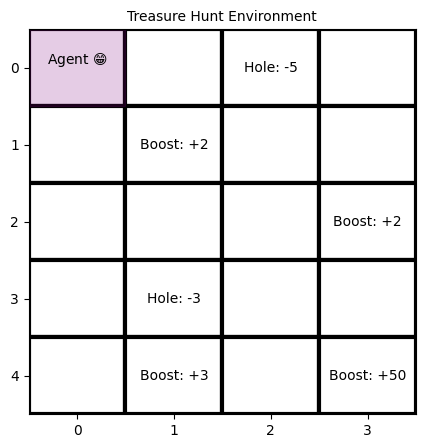

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 2
Current_state: (0, 1)
Chosen action: 0 : Right
Reward for current state: 0
Next state: (0, 2)
Reward for the next state: -5
Current total reward: 0


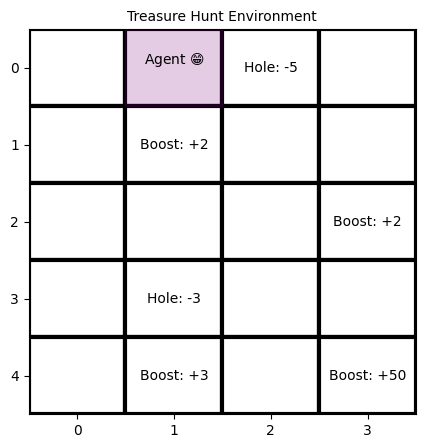

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 3
Current_state: (0, 2)
Chosen action: 2 : Up
Reward for current state: -5
Next state: (0, 2)
Reward for the next state: -5
Current total reward: -5


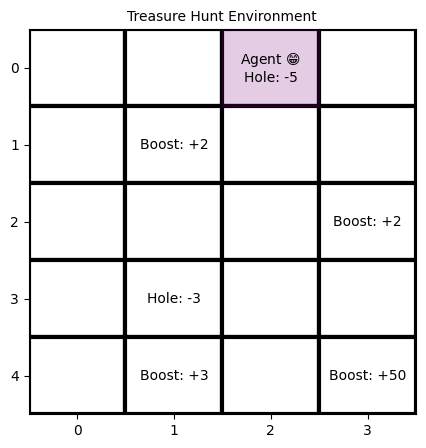

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 4
Current_state: (0, 2)
Chosen action: 3 : Down
Reward for current state: -5
Next state: (1, 2)
Reward for the next state: 0
Current total reward: -10


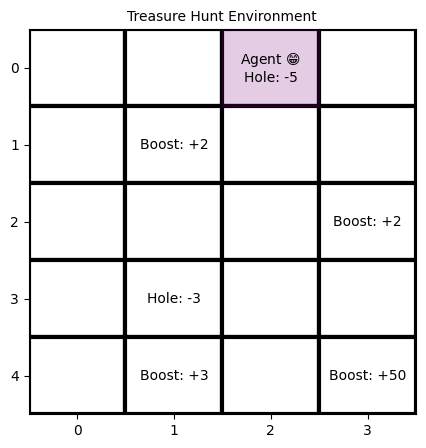

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 5
Current_state: (1, 2)
Chosen action: 1 : Left
Reward for current state: 0
Next state: (1, 1)
Reward for the next state: 2
Current total reward: -10


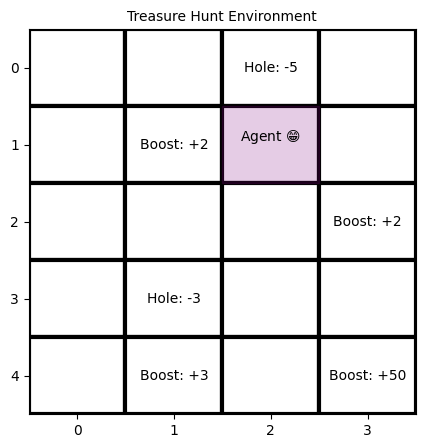

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 6
Current_state: (1, 1)
Chosen action: 1 : Left
Reward for current state: 2
Next state: (1, 0)
Reward for the next state: 0
Current total reward: -8


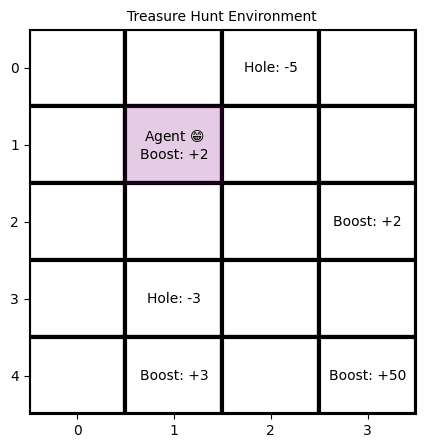

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 7
Current_state: (1, 0)
Chosen action: 1 : Left
Reward for current state: 0
Next state: (1, 0)
Reward for the next state: 0
Current total reward: -8


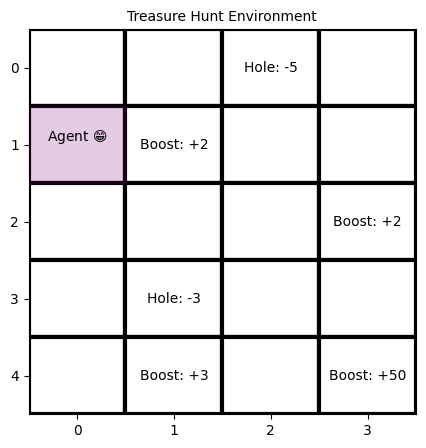

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 8
Current_state: (1, 0)
Chosen action: 1 : Left
Reward for current state: 0
Next state: (1, 0)
Reward for the next state: 0
Current total reward: -8


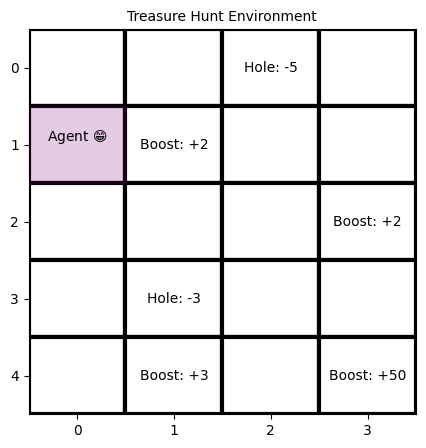

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 9
Current_state: (1, 0)
Chosen action: 1 : Left
Reward for current state: 0
Next state: (1, 0)
Reward for the next state: 0
Current total reward: -8


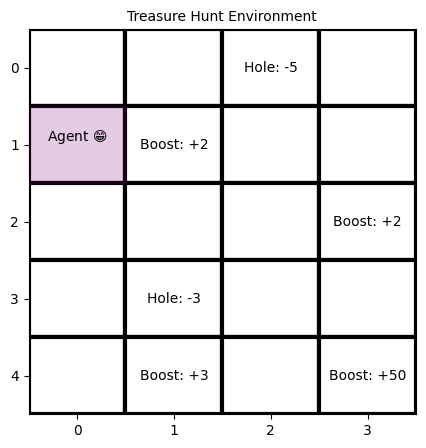

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Episode: 10
Current_state: (1, 0)
Chosen action: 3 : Down
Reward for current state: 0
Next state: (2, 0)
Reward for the next state: 0
Current total reward: -8


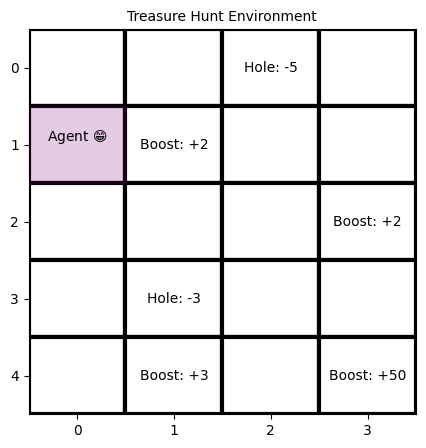

--------------------------------------------------------------------------


In [140]:
#Running random agent for 10 steps
env = TreasureHuntEnvironment("deterministic")
init=env.reset()
reward_total = 0
episodes=10
count=0
action_dict={"0":"Right","1":"Left","2":"Up","3":"Down"}

while not env.done and count!=episodes:
  current_pos=env.agent_pos
  current_reward=env.rewards[current_pos]
  reward_total+=env.rewards[env.agent_pos]
  action = env.action_space.sample()
  next_state,reward,is_done=env.step(action)
  print("--------------------------------------------------------------------------")
  print(f"Episode: {count+1}")
  print(f"Current_state: { current_pos}" )
  print(f"Chosen action: {action} : {action_dict[str(action)]}")
  print(f"Reward for current state: {current_reward}")
  print(f"Next state: {next_state}")
  print(f"Reward for the next state: {env.rewards[env.agent_pos]}")
  print(f"Current total reward: {reward_total}")


  count+=1
  env.render(current_pos)
  print("--------------------------------------------------------------------------")


##### SARSA learning approach

In [141]:

class SARSA_Agent():
  def __init__(self,alpha=0.5, gamma=0.8, epsilon=1,max_timesteps=500):
    self.num_states=20
    self.num_actions=4
    self.alpha=alpha
    self.epsilon=epsilon
    self.gamma=gamma
    self.qtable=np.zeros((self.num_states,self.num_actions))
    self.max_timesteps=max_timesteps

  #taking action based on epsilon
  def eps_greedy(self,state):
    if np.random.random()<self.epsilon:
      return env.action_space.sample()
    else:
      return np.argmax(self.qtable[state])

  #updating q-table
  def update_q(self,state, action, reward, next_state, next_action):
    self.qtable[state,action] += self.alpha*(float(reward) + self.gamma*self.qtable[next_state,next_action]-self.qtable[state,action])

  #training the agent
  def train_agent_epsilon_decay(self,env,episodes,min_eps=0.01,eps_decay=0.7):
    rewards=[]
    eps_values=[]

    #training agent for set episodes
    for episode in range(episodes):
      state = env.reset()
      state_q = state[0]*env.envt_length+state[1]
      action = self.eps_greedy(state_q)
      env.done=False
      total_reward = 0
      count_steps=0

      #limiting agent's movement numbers to until the goal is reached and while within max timesteps
      while not env.done and count_steps<self.max_timesteps:
        next_state, reward, done = env.step(action)
        next_state_q = next_state[0]*env.envt_length+next_state[1]
        next_action = self.eps_greedy(next_state_q)
        self.update_q(state_q,action,reward,next_state_q,next_action)
        state_q=next_state_q
        action=next_action
        total_reward+=reward
        count_steps+=1

      rewards.append(total_reward)
      eps_values.append(self.epsilon)
      self.epsilon = max(min_eps, self.epsilon * eps_decay)
      #print(f"Episode:{episode}, Average reward: {np.mean(rewards)}")
    return self.qtable,rewards,eps_values


  #Greedy policy evaluation for assessing performance
  def train_agent_greedy_policy(self,env,episodes):
    rewards=[]
    #self.qtable=np.zeros((self.num_states,self.num_actions))
    for episode in range(episodes):
      state = env.reset()
      state_q = state[0]*env.envt_length+state[1]
      #print(f"Initial state: {state}, {state_q}")
      #action = np.argmax(self.qtable[state_q])
      env.done=False
      total_reward = 0
      count_steps=0
      while not env.done and count_steps<self.max_timesteps:
        action = np.argmax(self.qtable[state_q])
        next_state, reward, done = env.step(action)
        next_state_q = next_state[0]*env.envt_length+next_state[1]
        total_reward+=reward
        state_q=next_state_q
        count_steps+=1
        #print(state_q)
      rewards.append(total_reward)
      #print(f"Reward per episode is: {rewards}")
    return self.qtable,rewards


#### Training the agent, plotting rewards and epsilon decay over set episodes

Initial Qtable

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Qtable after training
[[-1.74406640e-01  1.05524317e+00  0.00000000e+00  1.44542738e+01]
 [-2.69741813e+00  2.70866420e+00 -3.88186082e-01  4.96050240e+00]
 [-1.00000000e+00  3.90169521e+00 -2.50000000e+00  1.60468988e+00]
 [ 0.00000000e+00 -3.75000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.85044396e+01  3.81663854e+00  2.70897470e+00  2.58202657e+00]
 [ 2.11607202e+01  3.14430197e+00  2.24520905e+00  2.82354862e+00]
 [ 5.50000000e-01  5.05697076e+00 -3.10623016e+00  2.692

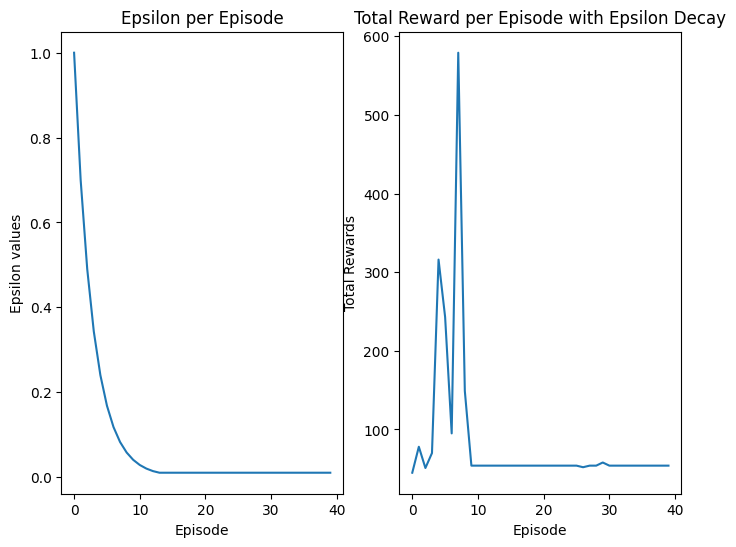


Average reward over all episodes: 82.55


In [142]:
##episode vs epsilon decay
th_env_eps_decay = TreasureHuntEnvironment("deterministic")
agent_eps_decay = SARSA_Agent()
episodes=40

print("Initial Qtable\n")
print(agent_eps_decay.qtable)
print("-"*100)
result=agent_eps_decay.train_agent_epsilon_decay(th_env_eps_decay,episodes)

print("-"*100)
print("\nQtable after training")
print(agent_eps_decay.qtable)

print("\nVisualisations\n")
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(range(episodes), result[2])
plt.xlabel('Episode')
plt.ylabel('Epsilon values')
plt.title('Epsilon per Episode')

plt.subplot(1,2,2)
plt.plot(range(episodes), result[1])
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode with Epsilon Decay')
plt.show()

print(f"\nAverage reward over all episodes: {np.mean(result[1])}")


#### Greedy Policy Evaluation

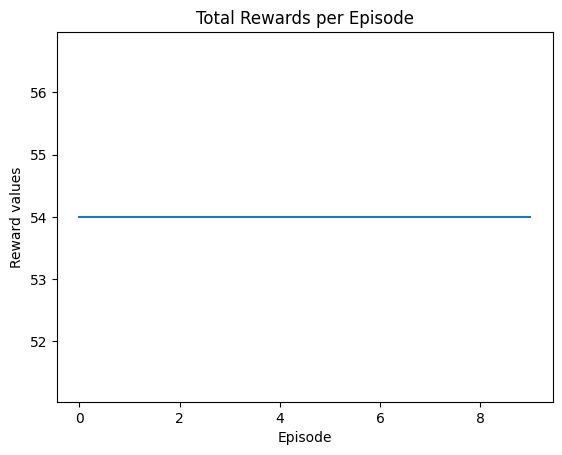


Total reward per episode for greedy evaluation: 54


In [143]:
th_env_greedy = TreasureHuntEnvironment("deterministic")
agent_greedy = agent_eps_decay
episodes=10

result=agent_greedy.train_agent_greedy_policy(th_env_greedy,episodes)

plt.plot(range(episodes), result[1])
plt.xlabel('Episode')
plt.ylabel('Reward values')
plt.title('Total Rewards per Episode')
plt.show()
print(f"\nTotal reward per episode for greedy evaluation: {result[1][0]}")

#### Hyperparameter Tuning

In [10]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 7.5 MB/s eta 0:00:00


In [193]:
import optuna
import numpy as np

def objective_sarsa(trial):

    alpha = trial.suggest_float("alpha", 0.1, 1.0, step=0.1)
    gamma = trial.suggest_float("gamma", 0.5, 1.0, step=0.05)
    epsilon = trial.suggest_float("epsilon", 0.1, 1.0, step=0.1)
    eps_decay = trial.suggest_float("eps_decay", 0.1, 0.99, step=0.05)
    min_eps = trial.suggest_float("min_eps", 0.01, 0.1, step=0.01)
    max_timesteps = trial.suggest_int("max_timesteps", 50, 500, step=50)
    episodes = trial.suggest_int("episodes", 50, 500, step=50)


    agent = SARSA_Agent(alpha=alpha, gamma=gamma, epsilon=epsilon,max_timesteps=max_timesteps)
    env=TreasureHuntEnvironment('deterministic')

    qtable, rewards, _ = agent.train_agent_epsilon_decay(env, episodes=episodes, min_eps=min_eps, eps_decay=eps_decay)
    avg_tot_reward = np.mean(rewards)
    return avg_tot_reward


study = optuna.create_study(direction="maximize")
study.optimize(objective_sarsa, n_trials=50)

# Display the best parameters and the corresponding reward
print("Best parameters:", study.best_params)
print("Best reward:", study.best_value)


[I 2024-12-06 18:29:02,673] A new study created in memory with name: no-name-13400f9e-554e-4947-8a5f-ebed1ea7b7ae
[I 2024-12-06 18:29:02,714] Trial 0 finished with value: 56.164 and parameters: {'alpha': 0.8, 'gamma': 0.9, 'epsilon': 0.4, 'eps_decay': 0.7000000000000001, 'min_eps': 0.06999999999999999, 'max_timesteps': 450, 'episodes': 500}. Best is trial 0 with value: 56.164.
[I 2024-12-06 18:29:02,729] Trial 1 finished with value: 54.24666666666667 and parameters: {'alpha': 0.30000000000000004, 'gamma': 0.7, 'epsilon': 0.5, 'eps_decay': 0.2, 'min_eps': 0.09, 'max_timesteps': 100, 'episodes': 150}. Best is trial 0 with value: 56.164.
[I 2024-12-06 18:29:02,805] Trial 2 finished with value: 71.58444444444444 and parameters: {'alpha': 0.2, 'gamma': 0.95, 'epsilon': 0.9, 'eps_decay': 0.85, 'min_eps': 0.08, 'max_timesteps': 400, 'episodes': 450}. Best is trial 2 with value: 71.58444444444444.
[I 2024-12-06 18:29:02,831] Trial 3 finished with value: 54.8 and parameters: {'alpha': 0.5, 'gam

Best parameters: {'alpha': 0.1, 'gamma': 1.0, 'epsilon': 1.0, 'eps_decay': 0.6, 'min_eps': 0.09999999999999999, 'max_timesteps': 300, 'episodes': 300}
Best reward: 680.8066666666666


- Training the RL environment using the optimised hyperparameters: {'alpha': 0.1, 'gamma': 1.0, 'epsilon': 1.0, 'eps_decay': 0.6, 'min_eps': 0.09999999999999999, 'max_timesteps': 300, 'episodes': 300}


Q-table before training
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
----------------------------------------------------------------------------------------------------
Q-table after training:
[[ 9.46995256e+01  2.95237651e+01  5.16790678e+01  3.30695899e+01]
 [ 1.25276120e+01  2.36413358e+01  4.82829433e+01  1.02262129e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.86954166e+01]
 [-4.87889635e-02  6.05328622e+00  1.51326852e+01  1.07515503e+02]
 [ 7.61256922e+01  6.68414513e-01  0.00000000e+00  0.00000000e+00]
 [ 1.01502869e+02  2.70638375e+01  3.18896144e+01  2.63787048e+01]
 [ 1.35622144e+02  4.86350108e+01  2.52069071e+01  6.63420403e+01]
 [ 1.02792511e+02  9.62042952e+01  7.99944037e+01  1.69826941e+02]
 [ 0.00000000

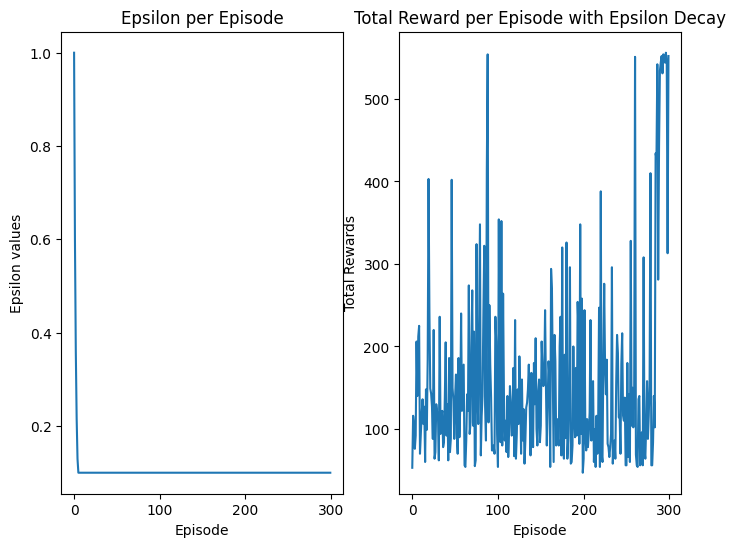


Average total reward for all episodes with epsilon Decay: 160.13


In [197]:
#Inittialising sarsa agent with best hyperparemeters
best_params_sarsa = study.best_params
test_env = TreasureHuntEnvironment('deterministic')
sarsa_agent = SARSA_Agent(gamma=best_params_sarsa["gamma"],epsilon=best_params_sarsa["epsilon"],alpha=best_params_sarsa["alpha"],max_timesteps=best_params_sarsa["max_timesteps"])

print("\nQ-table before training")
print(sarsa_agent.qtable)
result=sarsa_agent.train_agent_epsilon_decay(test_env,episodes=best_params_sarsa["episodes"],eps_decay=best_params_sarsa["eps_decay"],min_eps=best_params_sarsa["min_eps"])

print("-"*100)
print("Q-table after training:")
print(result[0])

print("\nVisualisations\n")
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(range(best_params_sarsa["episodes"]), result[2])
plt.xlabel('Episode')
plt.ylabel('Epsilon values')
plt.title('Epsilon per Episode')

plt.subplot(1,2,2)
plt.plot(range(best_params_sarsa["episodes"]), result[1])
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode with Epsilon Decay')
plt.show()

print(f"\nAverage total reward for all episodes with epsilon Decay: {np.mean(result[1])}")


#### Evaluating the greedy choice of Qtable generated with updated hyperparameter training

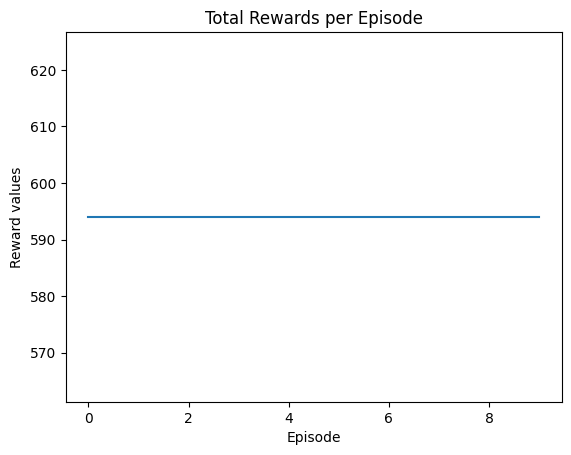


Total reward on greedy evaluation: 594


In [198]:
episodes=10

result=sarsa_agent.train_agent_greedy_policy(test_env,episodes)

plt.plot(range(episodes), result[1])
plt.xlabel('Episode')
plt.ylabel('Reward values')
plt.title('Total Rewards per Episode')
plt.show()

print(f"\nTotal reward on greedy evaluation: {result[1][1]}")

#### On evaluating by using greedy policy for 10 episodes:-
- Original rewards collected with initital hyperparameters: 54
- final best rewards collected with optimised hyperparameters: 594

## Effect of hyperparameter tuning on the model

- The original max rewards possible after training with initial set of hyperparameters was +54. After optimisation, the best rewards collected is +594, indicating that the model was improved with the new set of hyperparameters.

## Part 3 : N-Step Double Q-Learning Agent

- Defining agent and functions

In [134]:
class NStepDoubleQ_Agent:
    def __init__(self, env, alpha=0.5, gamma=0.8, epsilon=1, n=1, max_timesteps=100):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n = n
        self.max_timesteps = max_timesteps
        self.q1 = np.zeros((env.envt_width * env.envt_length, env.action_space.n))  # Q1 table
        self.q2 = np.zeros((env.envt_width * env.envt_length, env.action_space.n))  # Q2 table

    #action selection based on epsilon
    def eps_greedy(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.action_space.n)
        else:
            q_values = self.q1[state] + self.q2[state]
            return np.argmax(q_values)

    #defining greedy action for making only greedy choices, for evaluation
    def greedy_action(self, state):
        q_values = self.q1[state] + self.q2[state]
        return np.argmax(q_values)

    #Updating 2 Q-tables using Double Q-Learning Rule for n-step update
    def update_q(self, state, action, G_n, next_state, next_action, q_table):
        if q_table is self.q1:
            q_table[state, action] += self.alpha * (
                G_n + (self.gamma ** self.n) * self.q2[next_state, next_action] - q_table[state, action]
            )
        else:
            q_table[state, action] += self.alpha * (
                G_n + (self.gamma ** self.n) * self.q1[next_state, next_action] - q_table[state, action]
            )

    def train(self, episodes, eps_decay=0.7,min_eps=0.01):
        rewards = []  #total reward per episode
        eps_values = []  # epsilon values per episode

        for episode in range(episodes):
            state = self.env.reset()
            state_q = state[0] * self.env.envt_length + state[1]
            action = self.eps_greedy(state_q)
            total_reward = 0
            steps = []
            rewards_buf = []
            timestep = 0

            #traversing the grid while not reaching maxsteps or goal
            while not self.env.done and timestep < self.max_timesteps:
                steps.append((state_q, action))
                next_state, reward, done = self.env.step(action)
                next_state_q = next_state[0] * self.env.envt_length + next_state[1]
                next_action = self.eps_greedy(next_state_q)
                rewards_buf.append(reward)
                timestep += 1

                # Perform n-step update
                if len(steps) >= self.n:
                    state_q_n, action_n = steps.pop(0)

                    G_n = 0
                    for i in range(self.n):
                      G_n+=self.gamma ** i * rewards_buf[i]
                    #sum(reward * (self.gamma ** idx) for idx, reward in enumerate(rewards_buf))
                    rewards_buf.pop(0)

                    if np.random.random() < 0.5:
                        self.update_q(state_q_n, action_n, G_n, next_state_q, next_action, self.q1)
                    else:
                        self.update_q(state_q_n, action_n, G_n, next_state_q, next_action, self.q2)

                    #rewards_buf.clear()
                    #steps.clear()

                state_q = next_state_q
                action = next_action
                total_reward += reward

            rewards.append(total_reward)  #total reward
            eps_values.append(self.epsilon)  #epsilon value
            self.epsilon = max(min_eps, self.epsilon * eps_decay)  #epsilon decay

        return rewards, eps_values

    #Evaluating the learning using greedy policy
    def test_greedy_policy(self, episodes):
        """Evaluate the agent using only greedy actions."""
        greedy_rewards = []

        for episode in range(episodes):
            state = self.env.reset()
            state_q = state[0] * self.env.envt_length + state[1]
            total_reward = 0
            timestep = 0

            while not self.env.done and timestep < self.max_timesteps:
                action = self.greedy_action(state_q)  # Choose action greedily
                next_state, reward, done = self.env.step(action)
                next_state_q = next_state[0] * self.env.envt_length + next_state[1]
                total_reward += reward
                state_q = next_state_q
                timestep += 1

            greedy_rewards.append(total_reward)  #Total reward for the episode

        return greedy_rewards

    def run_experiments(self, n_values, episodes=100, eps_decay=0.7,min_eps=0.01,epsilon=1):
        n_reward=[]
        for n in n_values:
            self.n = n
            self.q1 = np.zeros_like(self.q1)
            self.q2 = np.zeros_like(self.q2)
            self.epsilon = epsilon

            print(f"\n=== Results for n = {n} ===")
            print("\nInitial Q1 Table:")
            print(self.q1)
            print("-"*50)
            print("\nInitial Q2 Table:")
            print(self.q2)

            # Train agent
            rewards, eps_values = self.train(episodes,eps_decay,min_eps)

            #Evaluate using greedy policy
            greedy_rewards = self.test_greedy_policy(episodes=10)
            n_reward.append(greedy_rewards[0])

            print("\nTrained Q1 Table:")
            print(self.q1)
            print("-"*50)
            print("\nTrained Q2 Table:")
            print(self.q2)
            print("-"*50)

            # Plot total rewards and epsilon decay for training and greedy choice evaluation
            print("Visualisations")
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 3, 1)
            plt.plot(range(episodes), rewards, label=f"Total Rewards (n={n})", color='blue')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.title(f'Total Rewards per Episode (n={n})')

            plt.subplot(1, 3, 2)
            plt.plot(range(episodes), eps_values, label=f"Epsilon Decay (n={n})", color='orange')
            plt.xlabel('Episode')
            plt.ylabel('Epsilon')
            plt.title(f'Epsilon Decay per Episode (n={n})')

            plt.subplot(1, 3, 3)
            plt.plot(range(10), greedy_rewards, label=f"Evaluation using greedy choice (n={n})", color='green')
            plt.xlabel('Episode')
            plt.ylabel('Epsilon')
            plt.title(f'Greedy Policy Evaluation (n={n})')

            plt.tight_layout()
            plt.show()

            print(f"\n Greedy policy total rewards for {10} episodes (n = {n}): {greedy_rewards[0]}")
        if(len(n_values)>1):
          n_val=int(np.argmax(n_reward))+1
          print(f"Rewards for n=1 to 5: {n_reward}")
          print(f"\nMax rewards is {np.max(n_reward)} for n = {n_val}")

#### Training the agent with initial parameter as defined and n=1


=== Results for n = 1 ===

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------------------------------------

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 1.94681544e+00  1.48808443e+00  1.91223640e+00  4.41075287e+00]
 [-3.00147352e+00  2.03808494e+00  2.07059513e+00  4.75642778e+00]
 [ 0.00000000e+00  1.95677880e+00 -2.50000000e+00 -1.50000000e+00]
 [ 0.00000000e+00 -2.50000000e+00  0.00000000e+00  0.00000000e

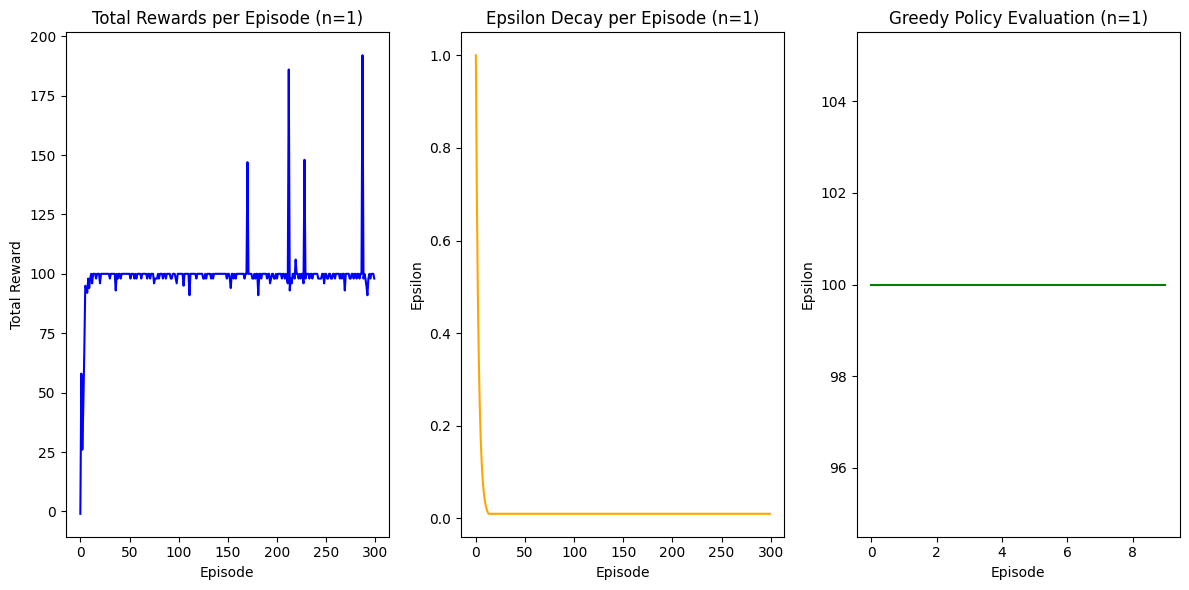


 Greedy policy total rewards for 10 episodes (n = 1): 100


In [138]:
#Running agent with initial hyperparaeters for 300 episodes
env = TreasureHuntEnvironment('deterministic')
agent = NStepDoubleQ_Agent(env)
agent.run_experiments(n_values=[1], episodes=300)

#### Hyperparameter optimisation

In [100]:
## Hyperparameter optimisation
import optuna
import numpy as np

def objective(trial):
    alpha = trial.suggest_float("alpha", 0.1, 1.0, step=0.1)
    gamma = trial.suggest_float("gamma", 0.5, 1.0, step=0.05)
    epsilon = trial.suggest_float("epsilon", 0.1, 1.0, step=0.1)
    eps_decay = trial.suggest_float("eps_decay", 0.5, 0.99, step=0.05)
    min_eps = trial.suggest_float("min_eps", 0.01, 0.1, step=0.01)
    max_timesteps = trial.suggest_int("max_timesteps", 50, 500, step=50)
    episodes = trial.suggest_int("episodes", 50, 500, step=50)
    n = 1


    env = TreasureHuntEnvironment('deterministic')
    agent = NStepDoubleQ_Agent(env, alpha=alpha, gamma=gamma, epsilon=epsilon, n=n, max_timesteps=max_timesteps)


    rewards, _ = agent.train(episodes=episodes, min_eps=min_eps, eps_decay=eps_decay)
    mean_reward = np.mean(rewards)

    return mean_reward


study = optuna.create_study(direction="maximize")  # Maximize the reward
study.optimize(objective, n_trials=100)

# Best model and performance
print("Best hyperparameters:", study.best_params)
print("Best average reward:", study.best_value)


[I 2024-12-06 16:42:39,446] A new study created in memory with name: no-name-6c33e78e-3015-496c-b8b6-730a545a2b6a
[I 2024-12-06 16:42:41,642] Trial 0 finished with value: 287.82444444444445 and parameters: {'alpha': 0.6, 'gamma': 1.0, 'epsilon': 0.9, 'eps_decay': 0.55, 'min_eps': 0.01, 'max_timesteps': 400, 'episodes': 450}. Best is trial 0 with value: 287.82444444444445.
[I 2024-12-06 16:42:41,656] Trial 1 finished with value: 56.78 and parameters: {'alpha': 0.9, 'gamma': 0.8500000000000001, 'epsilon': 0.30000000000000004, 'eps_decay': 0.8500000000000001, 'min_eps': 0.08, 'max_timesteps': 200, 'episodes': 50}. Best is trial 0 with value: 287.82444444444445.
[I 2024-12-06 16:42:41,700] Trial 2 finished with value: 56.21666666666667 and parameters: {'alpha': 0.9, 'gamma': 0.55, 'epsilon': 0.8, 'eps_decay': 0.65, 'min_eps': 0.03, 'max_timesteps': 500, 'episodes': 300}. Best is trial 0 with value: 287.82444444444445.
[I 2024-12-06 16:42:41,760] Trial 3 finished with value: 60.228 and para

Best hyperparameters: {'alpha': 0.2, 'gamma': 1.0, 'epsilon': 0.2, 'eps_decay': 0.6, 'min_eps': 0.01, 'max_timesteps': 350, 'episodes': 400}
Best average reward: 622.825


#### Best hyperparameters

In [101]:
#Best hyperparameters after hypertuning
print("Best parameters: " )
print(study.best_params)

Best parameters: 
{'alpha': 0.2, 'gamma': 1.0, 'epsilon': 0.2, 'eps_decay': 0.6, 'min_eps': 0.01, 'max_timesteps': 350, 'episodes': 400}


#### Training and evaluating the best hyperparameters using greedy choice

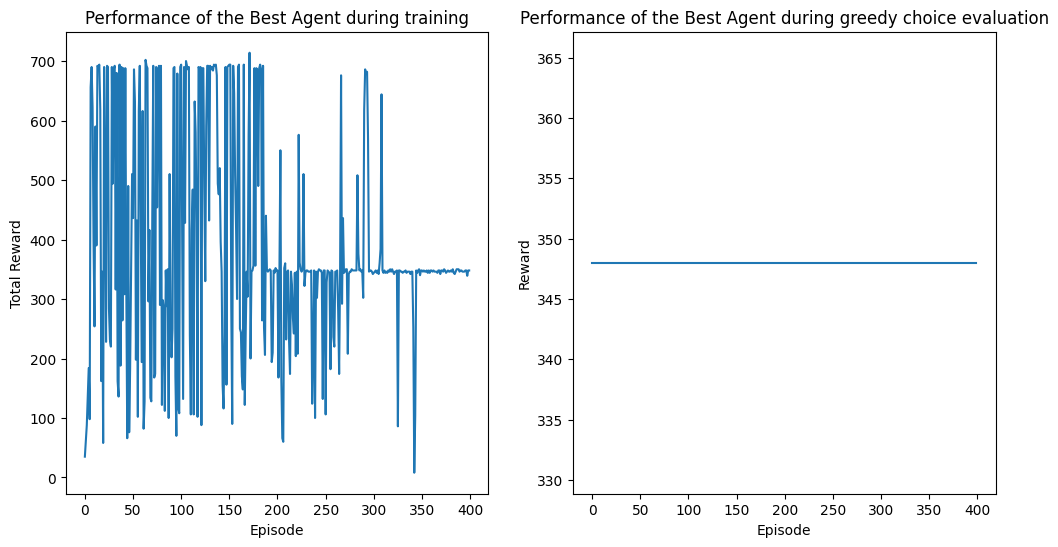

Greedy evaluation reward with best model for n=1: 348


In [105]:
# Training the final model with best hyperparameters
best_params_ndq = study.best_params
env = TreasureHuntEnvironment('deterministic')
best_agent = NStepDoubleQ_Agent(
    env,
    alpha=best_params_ndq["alpha"],
    gamma=best_params_ndq["gamma"],
    epsilon=best_params_ndq["epsilon"],
    n=1,
    max_timesteps=best_params_ndq["max_timesteps"],
)

rewards, eps_values = best_agent.train(
    episodes=best_params_ndq["episodes"],
    min_eps=best_params_ndq["min_eps"],
    eps_decay=best_params_ndq["eps_decay"],
)

greedy_rewards = best_agent.test_greedy_policy(episodes=best_params_ndq["episodes"])


plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(range(best_params_ndq["episodes"]), rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Performance of the Best Agent during training")

plt.subplot(1,2,2)
plt.plot(range(best_params_ndq["episodes"]), greedy_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Performance of the Best Agent during greedy choice evaluation")
plt.show()

print(f"Greedy evaluation reward with best model for n=1: {greedy_rewards[0]}")


#### Rewards and epsilon decay over episodes, for n=1 to 5


=== Results for n = 1 ===

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------------------------------------

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 0.00000000e+00  2.88000000e-02  0.00000000e+00  5.70603350e+02]
 [-1.00000000e+00  2.93708520e+02  0.00000000e+00  0.00000000e+00]
 [ 1.89695982e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.00000000e-01  1.91540443e+01 -3.60000000e-01  5.77833171e

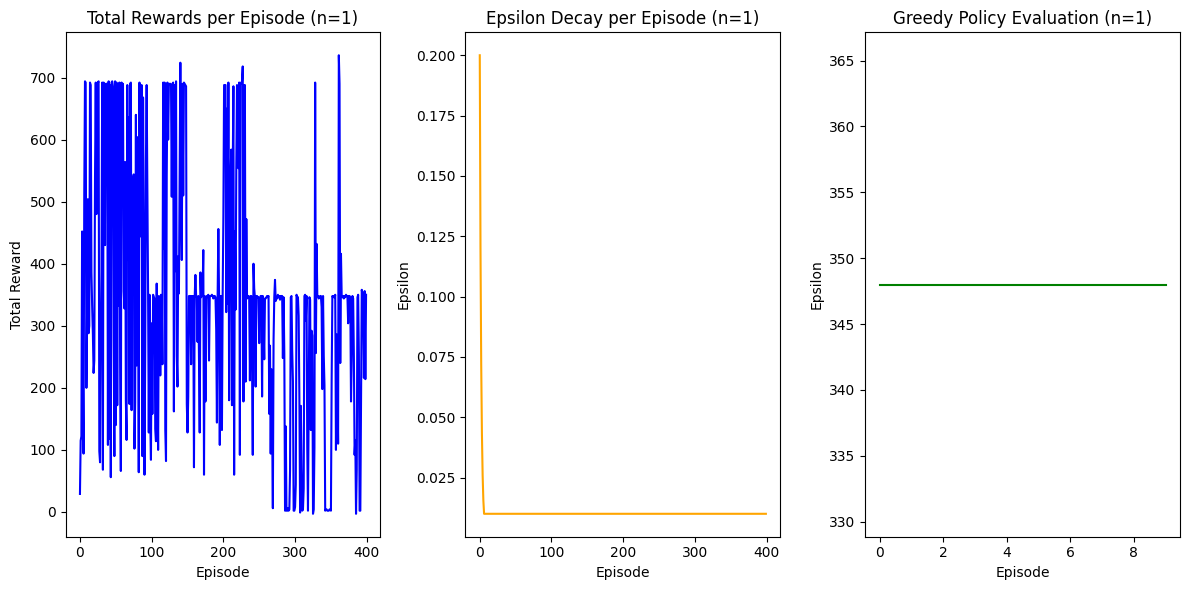


 Greedy policy total rewards for 10 episodes (n = 1): 348

=== Results for n = 2 ===

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------------------------------------

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 9.48454082e+02  0.00000000e+00  0.00000000e+00  2.36262779e+03]
 [-1.00000000e+00  4.48269029e+02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-

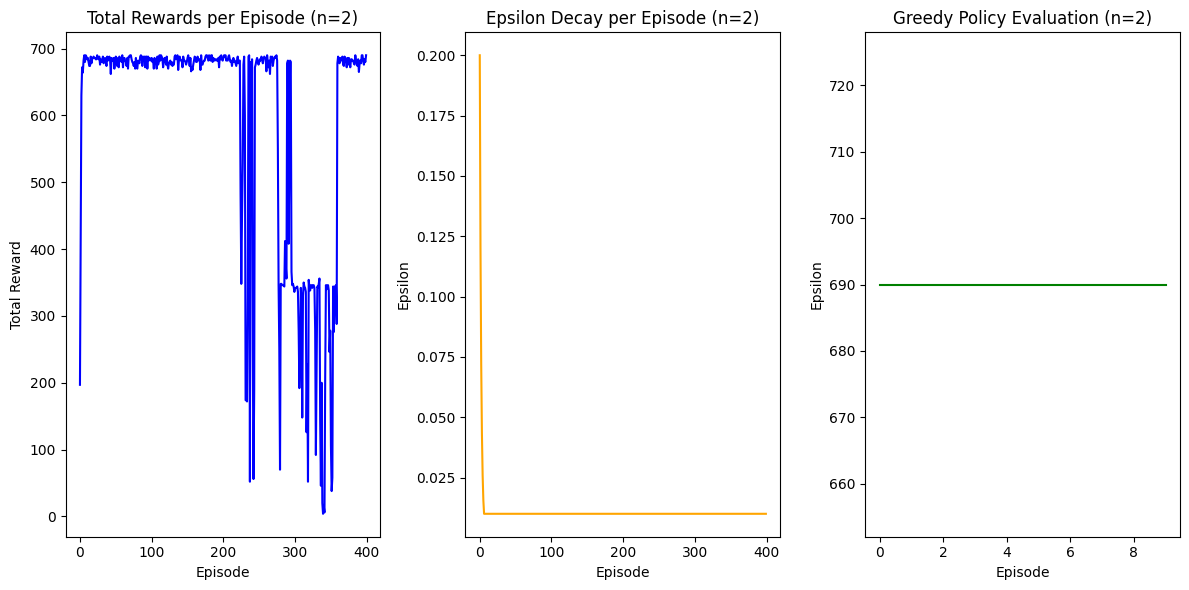


 Greedy policy total rewards for 10 episodes (n = 2): 690

=== Results for n = 3 ===

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------------------------------------

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 1.75752771e+03  0.00000000e+00  0.00000000e+00  1.00021616e+04]
 [-2.00000000e+00  2.87264220e+03  0.00000000e+00  0.00000000e+00]
 [ 1.57149075e+00  0.00000000e+00 -2.40000000e+00 -1.00000000e+00]
 [ 

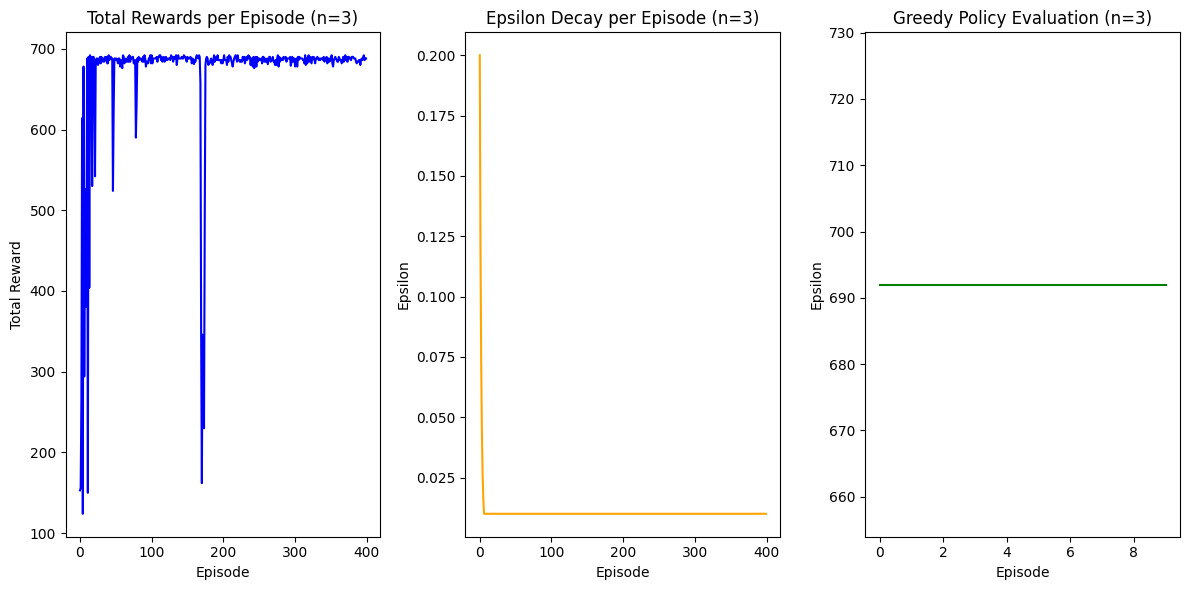


 Greedy policy total rewards for 10 episodes (n = 3): 692

=== Results for n = 4 ===

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------------------------------------

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 8.98441974e+02  0.00000000e+00  0.00000000e+00  4.52351517e+03]
 [-1.77600000e+00  1.47560860e+03  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00 -2.00000000e+00 -8.56000000e-01  3.81839584e+03]
 [ 

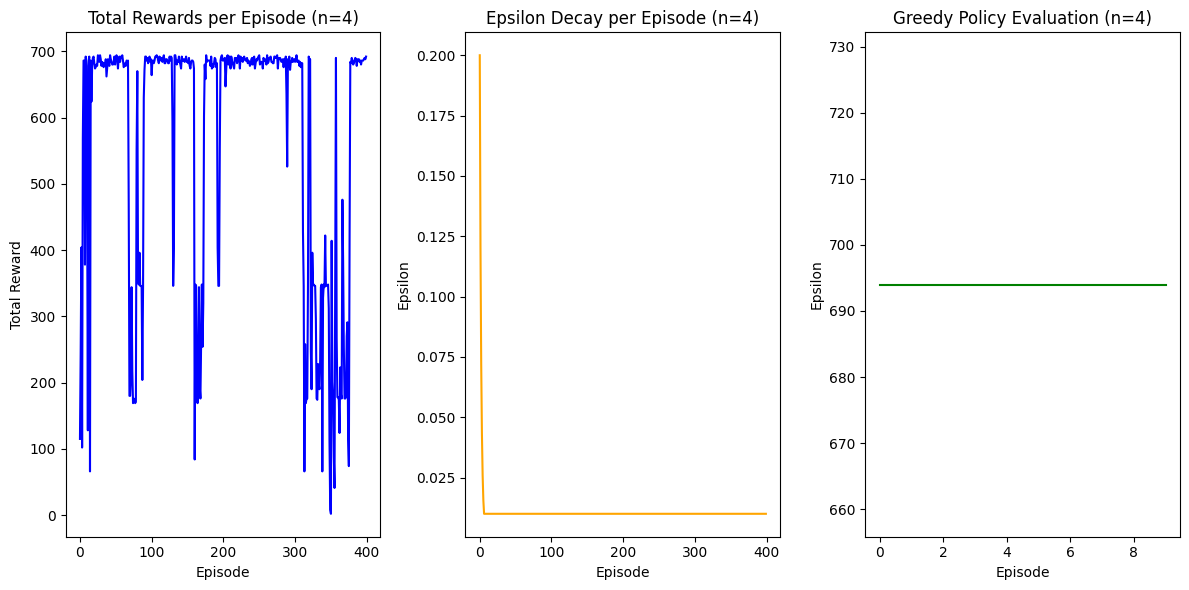


 Greedy policy total rewards for 10 episodes (n = 4): 694

=== Results for n = 5 ===

Initial Q1 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------------------------------------

Initial Q2 Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q1 Table:
[[ 6.59475931e+02  1.42174976e+02  0.00000000e+00  6.56594098e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00 -2.00000000e+00 -8.00000000e+00  0.00000000e+00]
 [-

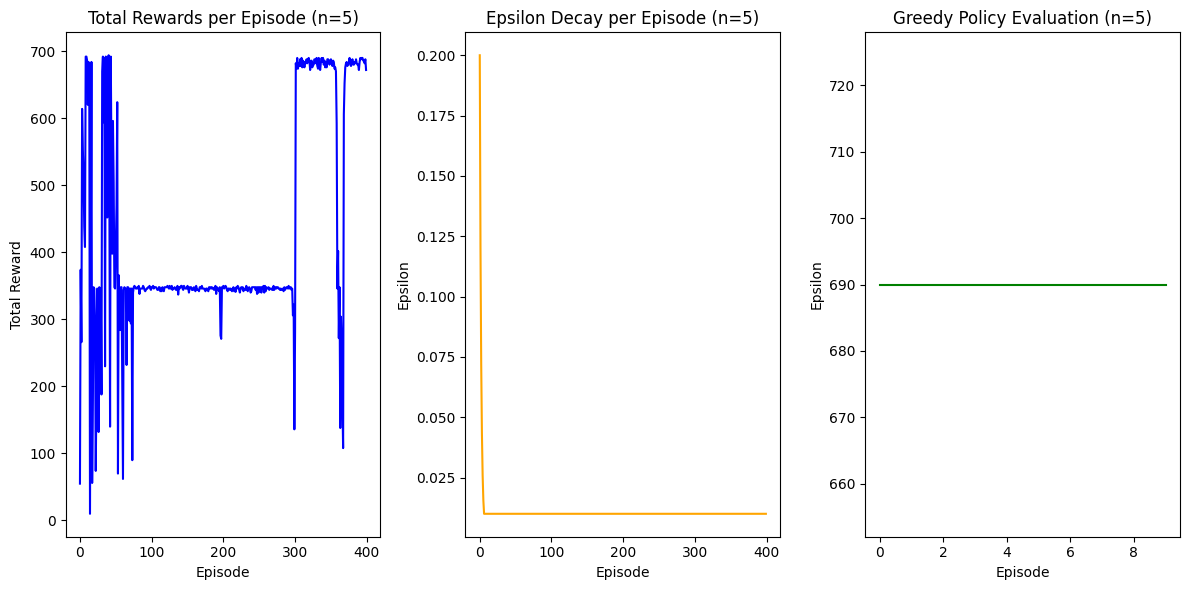


 Greedy policy total rewards for 10 episodes (n = 5): 690
Rewards for n=1 to 5: [348, 690, 692, 694, 690]

Max rewards is 694 for n = 4


In [106]:
## rewards and epsilon for n=1 to 5
env = TreasureHuntEnvironment('deterministic')
agent = NStepDoubleQ_Agent(env,alpha=best_params_ndq["alpha"],gamma=best_params_ndq["gamma"],epsilon=best_params_ndq["epsilon"],max_timesteps=best_params_ndq["max_timesteps"])
agent.run_experiments(n_values=[1,2,3,4,5], episodes=best_params_ndq["episodes"],eps_decay=best_params_ndq["eps_decay"],min_eps=best_params_ndq["min_eps"],epsilon=best_params_ndq["epsilon"])

- Analysis: The best n value for the model is 4, which returns a max reward of 694. The hyperparameters 'alpha': 0.2, 'gamma': 1.0, 'epsilon': 0.2, 'eps_decay': 0.6, 'min_eps': 0.01, 'max_timesteps': 350, 'episodes': 400 helps the model perform better. The small learning rate is likely to help the model learn slowly, getting better convergence. A discount factor of one encourages the model to prioritise future rewards, which give optimal Q values. A 0.2 value of epsilon is encouraging the model to explore more in the early steps, which the decay rate of 0.6 quickly drops the epsilon to limit exploration and prioritise exploitation. Within 400 episodes the model is able to maximise rewards and is able to explore the grid properly within max timestep of 350.

##### Comparison of performance of SARSA vs N-step Double Q-Learning Updates:

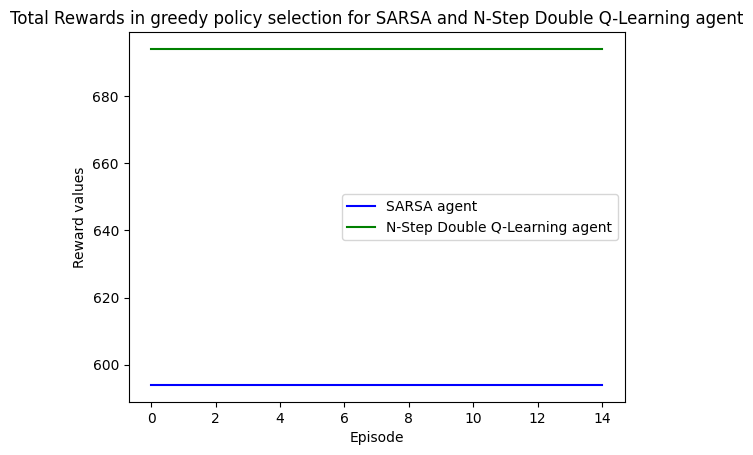


SARSA Agent Reward: 594 
N-Step Double Q-Learning Agent Reward: 694


In [203]:
#SARSA agent:
episodes=15
test_env = TreasureHuntEnvironment('deterministic')
sarsa_agent = SARSA_Agent(gamma=best_params_sarsa["gamma"],epsilon=best_params_sarsa["epsilon"],alpha=best_params_sarsa["alpha"],max_timesteps=best_params_sarsa["max_timesteps"])
train_result=sarsa_agent.train_agent_epsilon_decay(test_env,episodes=best_params_sarsa["episodes"],eps_decay=best_params_sarsa["eps_decay"],min_eps=best_params_sarsa["min_eps"])
result=sarsa_agent.train_agent_greedy_policy(test_env,episodes)
sarsa_rewards=result[1]

#N-Step Double Q-Learning Agent:
ndq_agent = NStepDoubleQ_Agent(test_env,alpha=best_params_ndq["alpha"],gamma=best_params_ndq["gamma"],epsilon=best_params_ndq["epsilon"],max_timesteps=best_params_ndq["max_timesteps"],n=4)
rewards, eps_values = ndq_agent.train(episodes=best_params_ndq["episodes"], min_eps=best_params_ndq["min_eps"], eps_decay=best_params_ndq["eps_decay"],)

ndq_rewards = ndq_agent.test_greedy_policy(episodes=episodes)


plt.plot(range(episodes), sarsa_rewards,color='blue',label="SARSA agent")
plt.plot(range(episodes), ndq_rewards,color='green',label="N-Step Double Q-Learning agent")
plt.xlabel('Episode')
plt.ylabel('Reward values')
plt.title('Total Rewards in greedy policy selection for SARSA and N-Step Double Q-Learning agent')
plt.legend()
plt.show()

print(f"\nSARSA Agent Reward: {sarsa_rewards[0]} \nN-Step Double Q-Learning Agent Reward: {ndq_rewards[0]}")
